In [64]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

!sudo apt-get install -y fonts-
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

'sudo'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
'sudo'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
'rm'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [65]:
path='E:/'
os.listdir(path)

['$RECYCLE.BIN',
 '1. 파일설명서',
 'Card-recommend-main',
 'fonts',
 'sepblock.csv',
 'shp(V3)',
 '~$동별블록코드축소판.xlsx',
 '동별블록코드축소판.xlsx',
 '블록_성별연령대별_201901.csv',
 '블록_성별연령대별_201901.txt',
 '블록_성별연령대별_2019011.csv',
 '블록_성별연령대별_201901111.csv',
 '블록_성별연령대별_201902.csv',
 '블록_성별연령대별_201903.txt',
 '블록_성별연령대별_201904.txt',
 '블록_성별연령대별_201905.txt',
 '블록_성별연령대별_201906.txt',
 '블록_성별연령대별_201907.txt',
 '블록_성별연령대별_201908.txt',
 '블록_성별연령대별_201909.txt',
 '블록_성별연령대별_201910.txt',
 '블록_성별연령대별_201911.txt',
 '블록_성별연령대별_201912.txt',
 '블록_성별연령대별_202001.txt',
 '블록_성별연령대별_202002.txt',
 '블록_성별연령대별_202003.txt',
 '블록_성별연령대별_202004.txt',
 '블록_성별연령대별_202005.txt',
 '블록_성별연령대별_202006.txt',
 '블록_성별연령대별_202007.txt',
 '블록_성별연령대별_202008.txt',
 '블록_성별연령대별_202009.txt',
 '블록_성별연령대별_202010.txt',
 '블록_성별연령대별_202011.txt',
 '블록_성별연령대별_202012.txt',
 '블록_시간대별소액결제건수_201901.txt',
 '블록_시간대별소액결제건수_201902.txt',
 '블록_시간대별소액결제건수_201903.txt',
 '블록_시간대별소액결제건수_201904.txt',
 '블록_시간대별소액결제건수_201905.txt',
 '블록_시간대별소액결제건수_201906.txt',
 '블록_시간대별소액결제건

In [66]:
UPJONG_Df=pd.read_csv(os.path.join(path, '블록_성별연령대별_201901111.csv'),encoding='utf-8', sep='|')
UPJONG_Df.head()

,서울시민업종코드,기준년월,고객주소블록코드,성별,연령대별,카드이용금액계,카드이용건수계
0,SS001,201901,158138,M,60대,1582560,30
1,SS002,201901,344052,F,30대,506520,10
2,SS002,201901,417018,M,30대,987840,50
3,SS008,201901,227572,F,20대,2074968,207
4,SS016,201901,207901,F,30대,3469435,474


In [67]:
UPJONG_Df.rename(columns={'서울시민업종코드':'UPJONG_CD'},inplace=True)
UPJONG_Df.head()


,UPJONG_CD,기준년월,고객주소블록코드,성별,연령대별,카드이용금액계,카드이용건수계
0,SS001,201901,158138,M,60대,1582560,30
1,SS002,201901,344052,F,30대,506520,10
2,SS002,201901,417018,M,30대,987840,50
3,SS008,201901,227572,F,20대,2074968,207
4,SS016,201901,207901,F,30대,3469435,474


In [68]:
sectorCodeDf=pd.read_csv(os.path.join(path, '서울시민 카드소비 업종코드.csv'), encoding='utf-8')
sectorCodeDf['UPJONG_CD'] = sectorCodeDf['UPJONG_CD'].str.upper()
sectorCodeDf.head()

,UPJONG_CD,CLASS1,CLASS2,CLASS3
0,SS001,요식/유흥,한식,한식
1,SS002,요식/유흥,일식/중식/양식,일식
2,SS003,요식/유흥,일식/중식/양식,양식
3,SS004,요식/유흥,일식/중식/양식,중식
4,SS005,요식/유흥,제과/커피/패스트푸드,제과점


In [69]:
UPJONG_Df=pd.merge(UPJONG_Df, sectorCodeDf, how='left', on='UPJONG_CD')
UPJONG_Df.head()
UPJONG_Df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10683783 entries, 0 to 10683782
Data columns (total 10 columns):
UPJONG_CD    object
기준년월         int64
고객주소블록코드     int64
성별           object
연령대별         object
카드이용금액계      int64
카드이용건수계      int64
CLASS1       object
CLASS2       object
CLASS3       object
dtypes: int64(4), object(6)
memory usage: 896.6+ MB


In [71]:
UPJONG_Df

,UPJONG_CD,기준년월,고객주소블록코드,성별,연령대별,카드이용금액계,카드이용건수계,CLASS1,CLASS2,CLASS3
0,SS001,201901,158138,M,60대,1582560,30,요식/유흥,한식,한식
1,SS002,201901,344052,F,30대,506520,10,요식/유흥,일식/중식/양식,일식
2,SS002,201901,417018,M,30대,987840,50,요식/유흥,일식/중식/양식,일식
3,SS008,201901,227572,F,20대,2074968,207,요식/유흥,기타요식,기타요식
4,SS016,201901,207901,F,30대,3469435,474,유통,편의점,편의점
5,SS035,201901,224894,F,20대,1438920,10,여행/교통,숙박,호텔/콘도
6,SS016,201901,8418,M,70대이상,253966,66,유통,편의점,편의점
7,SS008,201901,216557,M,50대,655200,20,요식/유흥,기타요식,기타요식
8,SS004,201901,352794,M,50대,1000440,15,요식/유흥,일식/중식/양식,중식
9,SS004,201901,232382,M,40대,379512,20,요식/유흥,일식/중식/양식,중식


In [73]:
blockdata = pd.read_excel("E:/동별블록코드축소판.xlsx")

In [74]:
blockdata

,"BLCK_CD,C,6","BLCK_NM,C,30","XCNTS,N,10,0","YCNTS,N,10,0","ADSTRD_CD,C,10","SIGNGU_CD,C,5","LCLAS_CD,C,10","MLSFC_CD,C,10","SCLAS_CD,C,10","RASTSP_AT,C,1","UNVTW_AT,C,1","H_LCLAS_CD,C,10","H_MLSFC_CD,C,10","H_SCLAS_CD,C,10","STDR_YM_CD,C,6"
0,154307,가락동,321661,544349,11710631,11710,4.0,401.0,40101.0,0.0,0.0,4.0,402.0,40201.0,2016
1,154281,가락동,321757,544350,11710631,11710,4.0,401.0,40101.0,0.0,0.0,2.0,201.0,20101.0,2016
2,154316,가락동,321569,544233,11710631,11710,4.0,401.0,40101.0,0.0,0.0,2.0,204.0,20401.0,2016
3,106319,가락동,321596,544244,11710631,11710,4.0,401.0,40101.0,0.0,0.0,2.0,204.0,20401.0,2016
4,154330,가락동,321668,544316,11710631,11710,4.0,401.0,40101.0,0.0,0.0,4.0,402.0,40201.0,2016
5,154322,가락동,321804,543914,11710631,11710,2.0,202.0,20201.0,0.0,0.0,2.0,201.0,20101.0,2016
6,115197,가락동,321480,544193,11710631,11710,4.0,401.0,40101.0,0.0,0.0,2.0,204.0,20401.0,2016
7,154019,가락동,321541,544222,11710631,11710,4.0,401.0,40101.0,0.0,0.0,2.0,204.0,20401.0,2016
8,154339,가락동,321645,544242,11710631,11710,4.0,401.0,40101.0,0.0,0.0,2.0,204.0,20401.0,2016
9,154022,가락동,321513,544210,11710631,11710,4.0,401.0,40101.0,0.0,0.0,2.0,204.0,20401.0,2016


In [106]:
blockdata.rename(columns={'BLCK_CD,C,6':'고객주소블록코드'},inplace=True)
blockdata.rename(columns={'BLCK_NM,C,30':'고객거주주소'},inplace=True)
blockdata

,고객주소블록코드,고객거주주소,"XCNTS,N,10,0","YCNTS,N,10,0","ADSTRD_CD,C,10","SIGNGU_CD,C,5","LCLAS_CD,C,10","MLSFC_CD,C,10","SCLAS_CD,C,10","RASTSP_AT,C,1","UNVTW_AT,C,1","H_LCLAS_CD,C,10","H_MLSFC_CD,C,10","H_SCLAS_CD,C,10","STDR_YM_CD,C,6"
0,154307,가락동,321661,544349,11710631,11710,4.0,401.0,40101.0,0.0,0.0,4.0,402.0,40201.0,2016
1,154281,가락동,321757,544350,11710631,11710,4.0,401.0,40101.0,0.0,0.0,2.0,201.0,20101.0,2016
2,154316,가락동,321569,544233,11710631,11710,4.0,401.0,40101.0,0.0,0.0,2.0,204.0,20401.0,2016
3,106319,가락동,321596,544244,11710631,11710,4.0,401.0,40101.0,0.0,0.0,2.0,204.0,20401.0,2016
4,154330,가락동,321668,544316,11710631,11710,4.0,401.0,40101.0,0.0,0.0,4.0,402.0,40201.0,2016
5,154322,가락동,321804,543914,11710631,11710,2.0,202.0,20201.0,0.0,0.0,2.0,201.0,20101.0,2016
6,115197,가락동,321480,544193,11710631,11710,4.0,401.0,40101.0,0.0,0.0,2.0,204.0,20401.0,2016
7,154019,가락동,321541,544222,11710631,11710,4.0,401.0,40101.0,0.0,0.0,2.0,204.0,20401.0,2016
8,154339,가락동,321645,544242,11710631,11710,4.0,401.0,40101.0,0.0,0.0,2.0,204.0,20401.0,2016
9,154022,가락동,321513,544210,11710631,11710,4.0,401.0,40101.0,0.0,0.0,2.0,204.0,20401.0,2016


In [115]:
blockdata['고객거주주소'].unique()

array(['가락동', '가락본동', '가리봉동', '가산동', '가양동', '가회동', '갈현동', '강일동', '개봉동',
       '개포동', '거여동', '고덕동', '고척동', '공덕동', '공릉동', '공항동', '광장동', '광희동',
       '교남동', '구로동', '구산동', '구의동', '군자동', '금호동', '길동', '길음동', '낙성대동',
       '난곡동', '난향동', '남가좌동', '남영동', '남현동', '내곡동', '노량진동', '녹번동', '논현동',
       '능동', '다산동', '답십리동', '당산동', '대림동', '대방동', '대조동', '대치동', '대학동',
       '대흥동', '도곡동', '도림동', '도봉동', '도화동', '독산동', '돈암동', '동선동', '동화동',
       '둔촌동', '등촌동', '마장동', '마천동', '망우동', '망우본동', '망원동', '면목동', '면목본동',
       '명동', '명일동', '목동', '무악동', '묵동', '문래동', '문정동', '미성동', '미아동', '반포동',
       '반포본동', '발산동', '방배동', '방배본동', '방이동', '방학동', '방화동', '번동', '보광동',
       '보라매동', '보문동', '부암동', '북가좌동', '북아현동', '불광동', '사근동', '사당동', '사직동',
       '삼각산동', '삼선동', '삼성동', '삼양동', '삼전동', '삼청동', '상계동', '상도동', '상봉동',
       '상암동', '상일동', '서강동', '서교동', '서림동', '서빙고동', '서원동', '서초동', '석관동',
       '석촌동', '성내동', '성북동', '성산동', '성수동', '성현동', '세곡동', '소공동', '송정동',
       '송중동', '송천동', '송파동', '수궁동', '수색동', '수서동', '수유동', '숭인동', '시흥동',
    

In [107]:
big_DF=pd.merge(UPJONG_Df, blockdata, how='left', on='고객주소블록코드')

In [108]:
big_DF['고객거주주소']

0            천호동
1            화곡동
2            화곡동
3            당산동
4            약수동
5            염리동
6            구산동
7            정릉동
8            신월동
9            성현동
10           방학동
11          방배본동
12           구로동
13           대치동
14           가양동
15           방학동
16           개포동
17           천호동
18           암사동
19           마천동
20          일원본동
21           성수동
22           상계동
23           자양동
24           개봉동
25           신정동
26           성북동
27          일원본동
28           행운동
29           풍납동
            ... 
10683753     청담동
10683754     신사동
10683755     역촌동
10683756     고덕동
10683757     중화동
10683758     상암동
10683759    잠실본동
10683760     보문동
10683761     거여동
10683762     수궁동
10683763     장안동
10683764     월곡동
10683765    영등포동
10683766     신정동
10683767     장위동
10683768     난곡동
10683769     송파동
10683770     신월동
10683771     사당동
10683772     구로동
10683773     도화동
10683774     신월동
10683775     화양동
10683776     정릉동
10683777    노량진동
10683778     가산동
10683779     공항동
10683780     면

In [109]:
UPbig_Df=big_DF.pivot_table(index=['CLASS1'],values=['카드이용금액계','카드이용건수계'],aggfunc='sum')
UPbig_Df

,카드이용건수계,카드이용금액계
CLASS1,,
가전/가구,1548483,288124483029
가정생활/서비스,14935708,880177453042
교육/학원,2402004,251570022533
미용,4413289,174376560059
스포츠/문화/레저,11995083,335666302383
여행/교통,6609428,410895400465
요식/유흥,88740227,1741590874949
유통,101747043,1962114962404
음/식료품,9670107,242096094426


In [111]:
UPbig_Df=big_DF.pivot_table(index=['고객거주주소','성별','연령대별','CLASS1'],values=['카드이용금액계','카드이용건수계'],aggfunc='sum')
UPbig_Df


카드이용건수계    카드이용금액계
고객거주주소 성별 연령대별  CLASS1                       
가락동    F  10대   가전/가구           15      89208
                가정생활/서비스       100    2694581
                교육/학원          290    6501852
                미용             130    2305548
                스포츠/문화/레저      691    6457803
                여행/교통          235    4338649
                요식/유흥         3238   32807728
                유통            2915   15736191
                음/식료품          155    1000440
                의료             120    2087064
                의류/잡화          125    1910412
                전자상거래          375    7621664
                주유              15     358525
          20대   가전/가구          701   81013161
                가정생활/서비스      3626  150447830
                교육/학원         1707   24000078
                미용            1973   66967640
                스포츠/문화/레저     5731  124407890
                여행/교통         2921  114808953
                요식/유흥        48511  675480108
                유통           37664  468531865
                음/식료품         2822   32747752
                의료            4905  195040487
                의류/잡화         2509   84829550
                자동차            235    2680877
                전자상거래        17289  741925560
                주유             486   19263605
          30대   가전/가구          997  660063540
                가정생활/서비스      7053  433060021
                교육/학원         2718  354020639
...                            ...        ...
흑석동    M  50대   전자상거래         4948  359640934
                주유            4428  225251539
          60대   가전/가구          245   68160456
                가정생활/서비스      3012  220506970
                교육/학원          200    5311102
                미용             520   16822512
                스포츠/문화/레저     1051   37557627
                여행/교통         1086   95952381
                요식/유흥        11543  325074304
                유통           11682  337721028
                음/식료품         1871   44443225
                의료            4908  221658594
                의류/잡화          315   27784411
                자동차            535   99222586
                전자상거래         1507   98769609
                주유            3714  166581752
          70대이상 가전/가구          100   20376871
                가정생활/서비스      1005   44879220
                교육/학원           80    1582308
                미용             125    7878931
                스포츠/문화/레저      340   51184980
                여행/교통          285   45197243
                요식/유흥         4520  126775253
                유통            4830  113511088
                음/식료품         1087   41007759
                의료            3171  145303953
                의류/잡화          175   15116371
                자동차            145    5769006
                전자상거래          325   35943672
                주유            1079   43704507

[46344 rows x 2 columns]

In [118]:
UPbig_Df['카드이용건수계순위']=UPbig_Df.groupby(['고객거주주소','연령대별','성별'])['카드이용건수계'].rank(ascending=False)
UPbig_Df['카드이용금액계순위']=UPbig_Df.groupby(['고객거주주소','연령대별','성별'])['카드이용금액계'].rank(ascending=False)

UPbig_Df

카드이용건수계    카드이용금액계  카드이용건수계순위  카드이용금액계순위
고객거주주소 성별 연령대별  CLASS1                                             
가락동    F  10대   가전/가구           15      89208       12.5       13.0
                가정생활/서비스       100    2694581       11.0        7.0
                교육/학원          290    6501852        5.0        4.0
                미용             130    2305548        8.0        8.0
                스포츠/문화/레저      691    6457803        3.0        5.0
                여행/교통          235    4338649        6.0        6.0
                요식/유흥         3238   32807728        1.0        1.0
                유통            2915   15736191        2.0        2.0
                음/식료품          155    1000440        7.0       11.0
                의료             120    2087064       10.0        9.0
                의류/잡화          125    1910412        9.0       10.0
                전자상거래          375    7621664        4.0        3.0
                주유              15     358525       12.5       12.0
          20대   가전/가구          701   81013161       12.0        9.0
                가정생활/서비스      3626  150447830        6.0        5.0
                교육/학원         1707   24000078       11.0       12.0
                미용            1973   66967640       10.0       10.0
                스포츠/문화/레저     5731  124407890        4.0        6.0
                여행/교통         2921  114808953        7.0        7.0
                요식/유흥        48511  675480108        1.0        2.0
                유통           37664  468531865        2.0        3.0
                음/식료품         2822   32747752        8.0       11.0
                의료            4905  195040487        5.0        4.0
                의류/잡화         2509   84829550        9.0        8.0
                자동차            235    2680877       14.0       14.0
                전자상거래        17289  741925560        3.0        1.0
                주유             486   19263605       13.0       13.0
          30대   가전/가구          997  660063540       13.0        4.0
                가정생활/서비스      7053  433060021        5.0        6.0
                교육/학원         2718  354020639       10.0        7.0
...                            ...        ...        ...        ...
흑석동    M  50대   전자상거래         4948  359640934        5.0        3.0
                주유            4428  225251539        6.0        7.0
          60대   가전/가구          245   68160456       13.0        9.0
                가정생활/서비스      3012  220506970        5.0        4.0
                교육/학원          200    5311102       14.0       14.0
                미용             520   16822512       11.0       13.0
                스포츠/문화/레저     1051   37557627        9.0       11.0
                여행/교통         1086   95952381        8.0        8.0
                요식/유흥        11543  325074304        2.0        2.0
                유통           11682  337721028        1.0        1.0
                음/식료품         1871   44443225        6.0       10.0
                의료            4908  221658594        3.0        3.0
                의류/잡화          315   27784411       12.0       12.0
                자동차            535   99222586       10.0        6.0
                전자상거래         1507   98769609        7.0        7.0
                주유            3714  166581752        4.0        5.0
          70대이상 가전/가구          100   20376871       13.0       10.0
                가정생활/서비스      1005   44879220        6.0        6.0
                교육/학원           80    1582308       14.0       14.0
                미용             125    7878931       12.0       12.0
                스포츠/문화/레저      340   51184980        7.0        4.0
                여행/교통          285   45197243        9.0        5.0
                요식/유흥         4520  126775253        2.0        2.0
                유통            4830  113511088        1.0        3.0
                음/식료품         1087   41007759        4.0        8.0
                의료            3171  145303953        3.0        1.0
               

In [126]:
Real_Df=UPbig_Df.drop(["카드이용건수계","카드이용금액계"],axis=1)


In [127]:
Real_Df

카드이용건수계순위  카드이용금액계순위
고객거주주소 성별 연령대별  CLASS1                         
가락동    F  10대   가전/가구           12.5       13.0
                가정생활/서비스        11.0        7.0
                교육/학원            5.0        4.0
                미용               8.0        8.0
                스포츠/문화/레저        3.0        5.0
                여행/교통            6.0        6.0
                요식/유흥            1.0        1.0
                유통               2.0        2.0
                음/식료품            7.0       11.0
                의료              10.0        9.0
                의류/잡화            9.0       10.0
                전자상거래            4.0        3.0
                주유              12.5       12.0
          20대   가전/가구           12.0        9.0
                가정생활/서비스         6.0        5.0
                교육/학원           11.0       12.0
                미용              10.0       10.0
                스포츠/문화/레저        4.0        6.0
                여행/교통            7.0        7.0
                요식/유흥            1.0        2.0
                유통               2.0        3.0
                음/식료품            8.0       11.0
                의료               5.0        4.0
                의류/잡화            9.0        8.0
                자동차             14.0       14.0
                전자상거래            3.0        1.0
                주유              13.0       13.0
          30대   가전/가구           13.0        4.0
                가정생활/서비스         5.0        6.0
                교육/학원           10.0        7.0
...                              ...        ...
흑석동    M  50대   전자상거래            5.0        3.0
                주유               6.0        7.0
          60대   가전/가구           13.0        9.0
                가정생활/서비스         5.0        4.0
                교육/학원           14.0       14.0
                미용              11.0       13.0
                스포츠/문화/레저        9.0       11.0
                여행/교통            8.0        8.0
                요식/유흥            2.0        2.0
                유통               1.0        1.0
                음/식료품            6.0       10.0
                의료               3.0        3.0
                의류/잡화           12.0       12.0
                자동차             10.0        6.0
                전자상거래            7.0        7.0
                주유               4.0        5.0
          70대이상 가전/가구           13.0       10.0
                가정생활/서비스         6.0        6.0
                교육/학원           14.0       14.0
                미용              12.0       12.0
                스포츠/문화/레저        7.0        4.0
                여행/교통            9.0        5.0
                요식/유흥            2.0        2.0
                유통               1.0        3.0
                음/식료품            4.0        8.0
                의료               3.0        1.0
                의류/잡화           10.0       11.0
                자동차             11.0       13.0
                전자상거래            8.0        9.0
                주유               5.0        7.0

[46344 rows x 2 columns]

In [129]:
Real_Df.to_csv('고객주소응용통계.csv')

In [136]:
DATA = pd.read_excel("E:/고객주소별정리데이터.xlsx")

In [137]:
DATA

,고객거주주소,성별,연령대별,CLASS1,카드이용건수계순위,카드이용금액계순위
0,가락동,F,10대,가전/가구,12.5,13.0
1,가락동,F,10대,가정생활/서비스,11.0,7.0
2,가락동,F,10대,교육/학원,5.0,4.0
3,가락동,F,10대,미용,8.0,8.0
4,가락동,F,10대,스포츠/문화/레저,3.0,5.0
5,가락동,F,10대,여행/교통,6.0,6.0
6,가락동,F,10대,요식/유흥,1.0,1.0
7,가락동,F,10대,유통,2.0,2.0
8,가락동,F,10대,음/식료품,7.0,11.0
9,가락동,F,10대,의료,10.0,9.0


In [92]:
big_DF['BLCK_NM,C,30']

KeyError: 'BLCK_NM,C,30'

In [14]:
UPbig_Df=UPJONG_Df.pivot_table(index=['CLASS1'],values=['카드이용금액계','카드이용건수계'],aggfunc='sum')
UPbig_Df

,카드이용건수계,카드이용금액계
CLASS1,,
가전/가구,1548483,288124483029
가정생활/서비스,14935708,880177453042
교육/학원,2402004,251570022533
미용,4413289,174376560059
스포츠/문화/레저,11995083,335666302383
여행/교통,6609428,410895400465
요식/유흥,88740227,1741590874949
유통,101747043,1962114962404
음/식료품,9670107,242096094426


In [15]:
UPadd_Df=UPJONG_Df.pivot_table(index=['고객주소블록코드','성별','연령대별','CLASS1'],values=['카드이용금액계','카드이용건수계'],aggfunc='sum')
UPadd_Df


카드이용건수계   카드이용금액계
고객주소블록코드 성별 연령대별  CLASS1                      
14       F  20대   가정생활/서비스         5     25200
                  교육/학원            5     74088
                  미용               5    114761
                  스포츠/문화/레저      141    477288
                  요식/유흥          105   1985659
                  유통              70    816984
                  음/식료품           10    138096
                  의료              10     45360
                  의류/잡화           15    336672
                  전자상거래           71   1557360
            30대   가정생활/서비스        10    483235
                  스포츠/문화/레저        5    196560
                  요식/유흥          161   2181312
                  유통              55   1376323
                  의료              35    851760
                  의류/잡화            5     90216
                  전자상거래           15    162691
            40대   가정생활/서비스         5     55944
                  스포츠/문화/레저        5    755496
                  의료               5    234360
            50대   가전/가구            5   1008000
                  미용              10    312480
                  요식/유흥           65   1615824
                  유통             136   2458159
                  음/식료품            5    932400
                  의료              45    635040
                  전자상거래           15   1811820
            60대   의료               5   1090606
         M  20대   유통               5     10080
            40대   가정생활/서비스         5     54331
...                              ...       ...
507600   M  50대   교육/학원           10   4585392
                  미용              15    115920
                  스포츠/문화/레저       30    655704
                  요식/유흥          282   3793936
                  유통             242   2521965
                  음/식료품           40    506016
                  의료              65   1087632
                  의류/잡화            5     25200
                  자동차              5     69552
                  전자상거래           35   2023862
                  주유               5    402787
            60대   가전/가구           10    438480
                  가정생활/서비스        50   1755936
                  교육/학원            5     30240
                  스포츠/문화/레저        5     50400
                  여행/교통           15    400957
                  요식/유흥          176   6832476
                  유통             201  11560551
                  음/식료품           20    458640
                  의료              10    171360
                  전자상거래           10    424368
                  주유             105   3490034
            70대이상 스포츠/문화/레저       10    296352
                  요식/유흥           65    999432
                  유통              40    559390
                  음/식료품            5     30240
                  의료              10    523656
                  자동차             20     61488
                  전자상거래           15    135072
                  주유              25   1632264

[4716071 rows x 2 columns]

In [17]:
UPadd2_Df=UPJONG_Df.pivot_table(index=['CLASS1','연령대별'],values=['카드이용금액계','카드이용건수계'],aggfunc='sum')
UPadd2_Df

UPadd2_Df.to_csv('업종연령.csv')

In [18]:
UPadd3_Df=UPJONG_Df.pivot_table(index=['CLASS1','연령대별','성별'],values=['카드이용금액계','카드이용건수계'],aggfunc='sum')
UPadd3_Df
UPadd3_Df.to_csv('업종연령성별.csv')

In [19]:
UPadd4_Df=UPJONG_Df.pivot_table(index=['연령대별'],values=['카드이용금액계','카드이용건수계'],aggfunc='sum')
UPadd4_Df
UPadd4_Df.to_csv('연령.csv')

In [20]:
UPadd5_Df=UPJONG_Df.pivot_table(index=['연령대별','CLASS1'],values=['카드이용금액계','카드이용건수계'],aggfunc='sum')
UPadd5_Df.to_csv('연령업종.csv')


In [21]:
# UPmid_Df=UPJONG_Df.pivot_table(index=['SB_L_UPJONG_NM(대분류_13분류)','SB_M_UPJONG_NM(중분류_30분류)'],values=['AMT_CORR(카드이용금액계)','USECT_CORR(카드이용건수)'],aggfunc='sum')
UPmid_Df=UPJONG_Df.pivot_table(index=['CLASS2'],values=['카드이용금액계','카드이용건수계'],aggfunc='sum')
UPmid_Df

,카드이용건수계,카드이용금액계
CLASS2,,
가전/가구,1548483,288124483029
각종요금,11552586,715087536713
교육용품,1631181,41208752182
교통,4662422,110063646368
기타요식,28396657,441925687905
기타유통,4769487,301889200564
기타의료,135656,45841970830
미용서비스,3090828,112517978292
백화점,5980986,422019436605


SyntaxError: positional argument follows keyword argument (<ipython-input-55-0e9660470771>, line 1)

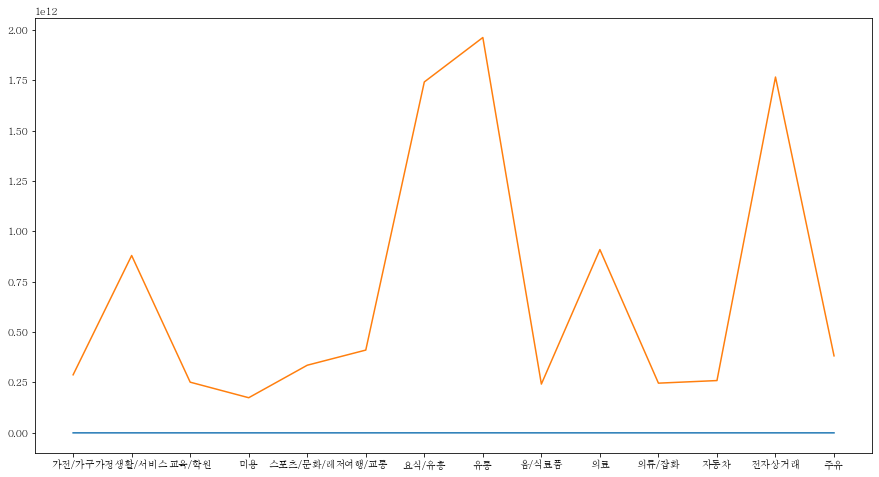

In [22]:
plt.rc('font', family='batang')
plt.figure(figsize=(15,8))
plt.plot(UPbig_Df)

# UPbig_Df.T.plot(axis=0)
# plt.rcParams["figure.figsize"] = (10,7)|
# plt.show()

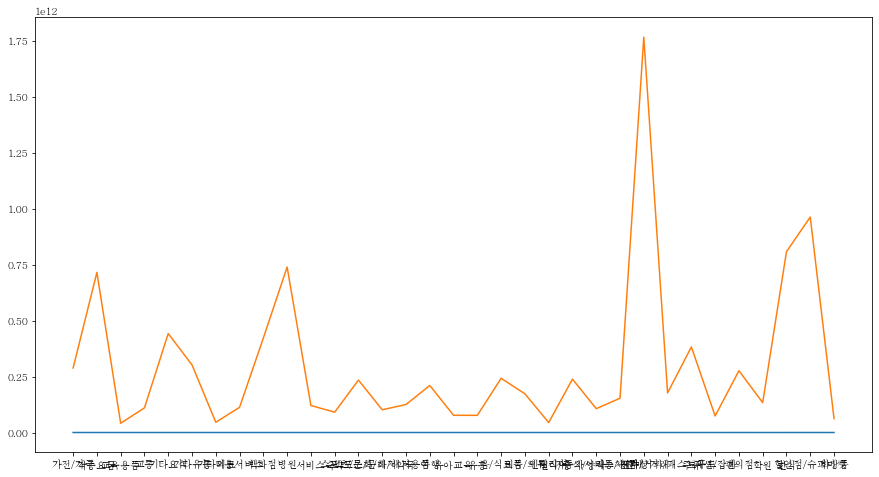

In [23]:
plt.figure(figsize=(15,8))
plt.plot(UPmid_Df)

In [30]:
UPadd3_Df=UPJONG_Df.pivot_table(index=['연령대별','성별','CLASS1',],values=['카드이용금액계','카드이용건수계'],aggfunc='sum')
UPadd3_Df

카드이용건수계      카드이용금액계
연령대별  성별 CLASS1                         
10대   F  가전/가구         5172    125025694
         가정생활/서비스     58907    561587109
         교육/학원        35061    513691492
         미용           37726    660118453
         스포츠/문화/레저   140748   1454812746
         여행/교통        24150    679650464
         요식/유흥       723645   7850769450
         유통          642539   3908675974
         음/식료품        43877    278949187
         의료           38447    769802110
         의류/잡화        59198   1231897490
         자동차            370      3666560
         전자상거래       171484   3639183038
         주유             925     23917022
      M  가전/가구         6514    132135343
         가정생활/서비스    100943    811707329
         교육/학원        17564    400632474
         미용           27670    458056924
         스포츠/문화/레저   457480   2547125066
         여행/교통        23416    690496023
         요식/유흥       607551   7485434981
         유통          745922   3864760895
         음/식료품        45626    256789921
         의료           30868    425514815
         의류/잡화        16426    602091254
         자동차            900     15642778
         전자상거래       127269   2979633398
         주유            7711     86277601
20대   F  가전/가구       136517  12552423636
         가정생활/서비스    998660  43436399608
...                     ...          ...
60대   M  전자상거래       342420  29616258641
         주유         1589551  67352112206
70대이상 F  가전/가구        19601   4929256297
         가정생활/서비스    196381  10249722936
         교육/학원        10806    910356904
         미용           63955   3249821960
         스포츠/문화/레저    55894   3991312620
         여행/교통        39015   3789093841
         요식/유흥       642635  17086414114
         유통         1254410  40354584588
         음/식료품       274012  10578752064
         의료          596170  30969072368
         의류/잡화        53387   5649639592
         자동차          13246   2599771208
         전자상거래       149591  13748193110
         주유           59334   2932626818
      M  가전/가구        26173   5974001830
         가정생활/서비스    268645  15883629772
         교육/학원        17707   1054267887
         미용           59538   1897200486
         스포츠/문화/레저    79726   4925652479
         여행/교통        79409   8799983419
         요식/유흥      1131475  31606189857
         유통         1311913  34426740237
         음/식료품       231540   9013250809
         의료          845046  43020621077
         의류/잡화        38852   3594268609
         자동차          47413   8734063534
         전자상거래        91137   8095911088
         주유          674540  24144144863

[196 rows x 2 columns]

In [43]:
dfForRank=UPadd3_Df.reset_index()
dfForRank

,연령대별,성별,CLASS1,카드이용건수계,카드이용금액계
0,10대,F,가전/가구,5172,125025694
1,10대,F,가정생활/서비스,58907,561587109
2,10대,F,교육/학원,35061,513691492
3,10대,F,미용,37726,660118453
4,10대,F,스포츠/문화/레저,140748,1454812746
5,10대,F,여행/교통,24150,679650464
6,10대,F,요식/유흥,723645,7850769450
7,10대,F,유통,642539,3908675974
8,10대,F,음/식료품,43877,278949187
9,10대,F,의료,38447,769802110


In [49]:
dfForRank['카드이용건수계순위']=dfForRank.groupby(['연령대별','성별'])['카드이용건수계'].rank(ascending=False)
dfForRank

,연령대별,성별,CLASS1,카드이용건수계,카드이용금액계,카드이용건수계순위
0,10대,F,가전/가구,5172,125025694,12.0
1,10대,F,가정생활/서비스,58907,561587109,6.0
2,10대,F,교육/학원,35061,513691492,10.0
3,10대,F,미용,37726,660118453,9.0
4,10대,F,스포츠/문화/레저,140748,1454812746,4.0
5,10대,F,여행/교통,24150,679650464,11.0
6,10대,F,요식/유흥,723645,7850769450,1.0
7,10대,F,유통,642539,3908675974,2.0
8,10대,F,음/식료품,43877,278949187,7.0
9,10대,F,의료,38447,769802110,8.0


In [54]:
dfForRank['카드이용금액계순위']=dfForRank.groupby(['연령대별','성별'])['카드이용금액계'].rank(ascending=False)
df = dfForRank['연령대별', '성별', 'CLASS1', '카드이용금액계순위']

KeyError: ('연령대별', '성별', 'CLASS1', '카드이용금액계순위')

In [62]:
dfForRank2 =dfForRank.drop(["카드이용건수계","카드이용금액계"],axis=1)
dfForRank2

,연령대별,성별,CLASS1,카드이용건수계순위,카드이용금액계순위
0,10대,F,가전/가구,12.0,12.0
1,10대,F,가정생활/서비스,6.0,9.0
2,10대,F,교육/학원,10.0,10.0
3,10대,F,미용,9.0,8.0
4,10대,F,스포츠/문화/레저,4.0,4.0
5,10대,F,여행/교통,11.0,7.0
6,10대,F,요식/유흥,1.0,1.0
7,10대,F,유통,2.0,2.0
8,10대,F,음/식료품,7.0,11.0
9,10대,F,의료,8.0,6.0


In [61]:
dfForRank2.to_csv('연령별성별응용집계.csv')

In [38]:
dataf= UPadd3_Df[UPadd3_Df['연령대별']== '10대']
dataf

KeyError: '연령대별'

In [29]:
rank_df=UPadd3_Df.rank(axis=0)
rank_df

카드이용건수계  카드이용금액계
CLASS1   연령대별  성별                  
가전/가구    10대   F      98.5     98.5
               M      98.5     98.5
         20대   F      98.5     98.5
               M      98.5     98.5
         30대   F      98.5     98.5
               M      98.5     98.5
         40대   F      98.5     98.5
               M      98.5     98.5
         50대   F      98.5     98.5
               M      98.5     98.5
         60대   F      98.5     98.5
               M      98.5     98.5
         70대이상 F      98.5     98.5
               M      98.5     98.5
가정생활/서비스 10대   F      98.5     98.5
               M      98.5     98.5
         20대   F      98.5     98.5
               M      98.5     98.5
         30대   F      98.5     98.5
               M      98.5     98.5
         40대   F      98.5     98.5
               M      98.5     98.5
         50대   F      98.5     98.5
               M      98.5     98.5
         60대   F      98.5     98.5
               M      98.5     98.5
         70대이상 F      98.5     98.5
               M      98.5     98.5
교육/학원    10대   F      98.5     98.5
               M      98.5     98.5
...                    ...      ...
자동차      70대이상 F      98.5     98.5
               M      98.5     98.5
전자상거래    10대   F      98.5     98.5
               M      98.5     98.5
         20대   F      98.5     98.5
               M      98.5     98.5
         30대   F      98.5     98.5
               M      98.5     98.5
         40대   F      98.5     98.5
               M      98.5     98.5
         50대   F      98.5     98.5
               M      98.5     98.5
         60대   F      98.5     98.5
               M      98.5     98.5
         70대이상 F      98.5     98.5
               M      98.5     98.5
주유       10대   F      98.5     98.5
               M      98.5     98.5
         20대   F      98.5     98.5
               M      98.5     98.5
         30대   F      98.5     98.5
               M      98.5     98.5
         40대   F      98.5     98.5
               M      98.5     98.5
         50대   F      98.5     98.5
               M      98.5     98.5
         60대   F      98.5     98.5
               M      98.5     98.5
         70대이상 F      98.5     98.5
               M      98.5     98.5

[196 rows x 2 columns]

In [ ]:
UPadd3_Df.to_csv('업종연령.csv')